<a href="https://colab.research.google.com/github/iprameshwari/hacktiv8/blob/main/PYIM_Assgn_1_8_Irma_Prameshwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data
memasukkan data student-por.csv dan data student-mat.csv

In [1]:
# import student-por.csv dan student-mat.csv

In [2]:
from google.colab import files
student_por = files.upload()


Saving student-por.csv to student-por.csv


In [3]:
student_mat = files.upload()

Saving student-mat.csv to student-mat.csv


# Import Library

In [1]:
# import pandas and io library
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Generate Dataframe from CSV

In [2]:
# generate dataframe from student-por.csv
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
# generate dataframe from student-mat.csv
df_mat = pd.read_csv('student-mat.csv')
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


# Drop column before expanding into one-hot encoding
Memilih kolom terpilih terlebih dahulu berdasarkan hipotesis awal yang menganggap kolom ***'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'nursery', dan 'higher'*** tidak memiliki hubungan terhadap konsumsi alkohol pada hari sekolah

Selanjutnya, mengubah data menjadi *one-hot encoding* agar dapat diterima oleh Model

In [6]:
df_student_exp = df_por.drop(columns=['famsize',  'Medu', 'Fedu','Mjob', 'Fjob', 'reason','guardian','traveltime', 'studytime', 'failures', 'schoolsup','nursery','higher'])

df_student_exp = pd.get_dummies(df_student_exp, columns=['school', 'sex', 'address', 'Pstatus',
       'famsup', 'paid', 'activities', 
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'])
df_student_exp

,age,Dalc,Walc,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,Pstatus_A,Pstatus_T,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,health_1,health_2,health_3,health_4,health_5
0,18,1,1,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,17,1,1,2,9,11,11,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,15,2,3,6,12,13,12,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,15,1,1,0,14,14,14,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,16,1,2,0,11,13,13,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,2,4,10,11,10,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
645,18,1,1,4,15,15,16,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
646,18,1,1,6,11,12,9,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
647,17,3,4,6,10,10,10,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


# Find Correlation between chosen variables

Kolom yang akan digunakan dicari terlebih dahulu nilai korelasinya menggunakan korelasi matrix dan dipilih yang memiliki angka **absolute lebih dari 0.1** 

In [49]:
corrmatrix = df_student_exp.corr()
y_corr = corrmatrix.loc['Dalc']
print(y_corr[abs(y_corr)>0.1])
z = y_corr[abs(y_corr)>0.1].to_list()
use_list = y_corr[abs(y_corr)>0.1].index.to_list()

print(use_list)

age           0.134768
Dalc          1.000000
Walc          0.616561
absences      0.172952
G1           -0.195171
G2           -0.189480
G3           -0.204719
sex_F        -0.282696
sex_M         0.282696
freetime_3   -0.102985
goout_1      -0.102644
goout_2      -0.115423
goout_5       0.212185
Name: Dalc, dtype: float64
['age', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'sex_F', 'sex_M', 'freetime_3', 'goout_1', 'goout_2', 'goout_5']


In [50]:
df_new = df_student_exp[use_list]
df_new

,age,Dalc,Walc,absences,G1,G2,G3,sex_F,sex_M,freetime_3,goout_1,goout_2,goout_5
0,18,1,1,4,0,11,11,1,0,1,0,0,0
1,17,1,1,2,9,11,11,1,0,1,0,0,0
2,15,2,3,6,12,13,12,1,0,1,0,1,0
3,15,1,1,0,14,14,14,1,0,0,0,1,0
4,16,1,2,0,11,13,13,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,2,4,10,11,10,1,0,0,0,1,0
645,18,1,1,4,15,15,16,1,0,1,0,0,0
646,18,1,1,6,11,12,9,1,0,0,1,0,0
647,17,3,4,6,10,10,10,0,1,0,0,0,1


# Split dataset into train and test dataset
Memisahkan dataset menjadi train dan test data yang akan dimasukkan ke dalam Model.

In [69]:
train_dataset = df_new.sample(frac=0.8, random_state=0)
test_dataset = df_new.drop(train_dataset.index)


In [70]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Dalc')
test_labels = test_features.pop('Dalc')

# Normalization
Melakukan normalisasi nilai dari fitur yang akan menjadi train_features

In [53]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,16.789981,1.236594
Dalc,1.520231,0.964162
Walc,2.271676,1.309819
absences,3.618497,4.656639
G1,11.344894,2.817233
G2,11.516378,3.026782
G3,11.843931,3.314400
sex_F,0.622351,0.485267
sex_M,0.377649,0.485267
freetime_3,0.381503,0.486224


In [54]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[16.78998     2.2716765   3.6184976  11.344894   11.516377   11.843932
  0.6223507   0.37764928  0.3815029   0.08285165  0.21194606  0.16763006]


In [55]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[16  4  2  9  7  8  0  1  0  0  1  0]]

Normalized: [[-0.64  1.32 -0.35 -0.83 -1.49 -1.16 -1.28  1.28 -0.79 -0.3   1.93 -0.45]]


# Function for plotting loss value
Mendefinisikan fungsi untuk plot nilai Loss

In [74]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Dalc]')
  plt.legend()
  plt.grid(True)

# Function for build and compile model
Mendefinisikan fungsi untuk membuat Model yang akan digunakan

In [75]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(16, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.05))
  return model

# Dense Neural Network Full Model
Membuat layer Dense Neural Network serta menjalankan fungsi Model lalu melakukan plotting data hasil proses training model

In [76]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [77]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.7 s, sys: 230 ms, total: 4.93 s
Wall time: 4.47 s


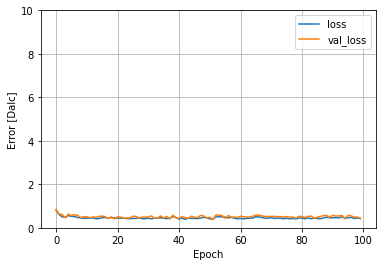

In [78]:
plot_loss(history)

In [79]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Dalc]']).T

,Mean absolute error [Dalc]
dnn_model,0.381086


# Make Predictions
Melakukan prediksi menggunakan data test berdasarkan hasil training sebelumnya serta melakukan visualisasi error yang dihasilkan 

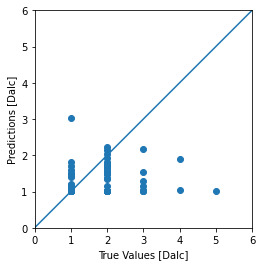

In [80]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Dalc]')
plt.ylabel('Predictions [Dalc]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

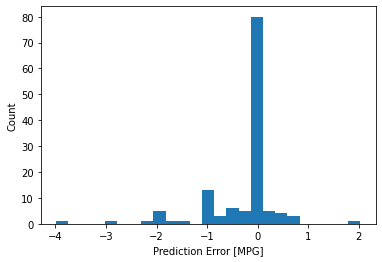

In [81]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Saving model for future predictions
Menyimpan model untuk digunakan di masa yang akan datang

In [82]:
dnn_model.save('dnn_model2')


INFO:tensorflow:Assets written to: dnn_model2/assets
